# 1. Exploratory Data Analysis (EDA) e Data Cleaning
In questo primo notebook affrontiamo la fase fondamentale di ispezione, pulizia e strutturazione dei dati grezzi.

Gli obiettivi principali di questa fase sono:
1. **Integrazione dei Dati:** Unione dei dataset `movies` e `credits` tramite chiave univoca (ID del film).
2. **Parsing e Strutturazione:** Estrazione delle informazioni chiave (generi, cast, crew, case di produzione) dai formati complessi (JSON/Dizionari) in cui sono memorizzate.
3. **Gestione delle Anomalie:** Trattamento dei valori nulli tramite mediana e rimozione dei record non validi per l'analisi predittiva (es. film con budget o incassi pari a zero).
4. **Ottimizzazione del Dataset:** Rimozione delle variabili testuali non strutturate (come url e descrizioni) per ottenere un dataset pulito e leggero, pronto per le successive fasi di ingegnerizzazione.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Carichiamo ed Ispezioniamo i Dati

In [28]:
movies  = pd.read_csv('../data/raw/tmdb_5000_movies.csv')
credits = pd.read_csv('../data/raw/tmdb_5000_credits.csv')

#facciamo un merge dei due dataset sull'id del film
df = movies.merge(credits, left_on='id', right_on='movie_id')

#pulizia nomi colonne duplicati dopo il merge
df = df.rename(columns={'title_x': 'title'})
df = df.drop(columns=['title_y', 'movie_id'], errors='ignore')

print(f"Dataset unito! Righe: {df.shape[0]}, Colonne: {df.shape[1]}")
display(df.head())

Dataset unito! Righe: 4803, Colonne: 22


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


## Ispezione iniziale

In [29]:
print("Shape:", df.shape)
print("\nTipi di dato:")
print(df.dtypes)
print("\nValori nulli per colonna:")
print(df.isnull().sum())

Shape: (4803, 22)

Tipi di dato:
budget                    int64
genres                      str
homepage                    str
id                        int64
keywords                    str
original_language           str
original_title              str
overview                    str
popularity              float64
production_companies        str
production_countries        str
release_date                str
revenue                   int64
runtime                 float64
spoken_languages            str
status                      str
tagline                     str
title                       str
vote_average            float64
vote_count                int64
cast                        str
crew                        str
dtype: object

Valori nulli per colonna:
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview           

# Parsing delle Colonne JSON

Diverse colonne del dataset TMDB contengono dati in formato JSON testuale (generi, keywords, cast, crew, ecc.).

Definiamo alcune funzioni di utilità per estrarre le informazioni rilevanti.

In [30]:
def estrai_nomi(testo):
    """estrae tutti i nomi da una stringa JSON con lista di dizionari."""
    try:
        lista = ast.literal_eval(testo)
        return [i['name'] for i in lista]
    except:
        return []

def estrai_primo_nome(testo):
    """estrae solo il primo nome (es. protagonista o casa di produzione principale)."""
    try:
        lista = ast.literal_eval(testo)
        return lista[0]['name'] if len(lista) > 0 else 'Unknown'
    except:
        return 'Unknown'

def estrai_regista(testo):
    """cerca nella crew il membro con job == 'Director'."""
    try:
        lista = ast.literal_eval(testo)
        for i in lista:
            if i.get('job') == 'Director':
                return i['name']
        return 'Unknown'
    except:
        return 'Unknown'

def estrai_n_cast(testo, n=3):
    """estrae i nomi dei primi n attori del cast."""
    try:
        lista = ast.literal_eval(testo)
        return [i['name'] for i in lista[:n]]
    except:
        return []

# --- applicazione delle funzioni ---

#generi: lista completa e genere principale
df['genres_list']= df['genres'].apply(estrai_nomi)
df['main_genre']  = df['genres_list'].apply(lambda x: x[0] if x else 'Unknown')

#leywords
df['keywords_list'] = df['keywords'].apply(estrai_nomi)

#case di produzione: lista completa e principale
df['companies_list'] = df['production_companies'].apply(estrai_nomi)
df['main_company']= df['production_companies'].apply(estrai_primo_nome)

#paesi di produzione
df['countries_list']= df['production_countries'].apply(estrai_nomi)

#lingue parlate
df['languages_list']= df['spoken_languages'].apply(estrai_nomi)

#cast: attore protagonista e numero totale di attori
df['lead_actor']= df['cast'].apply(estrai_primo_nome)
df['top3_cast']= df['cast'].apply(lambda x: estrai_n_cast(x, 3))
df['cast_size']= df['cast'].apply(lambda x: len(ast.literal_eval(x)) if pd.notna(x) else 0)

#crew: regista
df['director']= df['crew'].apply(estrai_regista)

print("Parsing JSON completato!")
display(df[['title', 'main_genre', 'main_company', 'lead_actor', 'director']].head(3))

Parsing JSON completato!


,title,main_genre,main_company,lead_actor,director
0,Avatar,Action,Ingenious Film Partners,Sam Worthington,James Cameron
1,Pirates of the Caribbean: At World's End,Adventure,Walt Disney Pictures,Johnny Depp,Gore Verbinski
2,Spectre,Action,Columbia Pictures,Daniel Craig,Sam Mendes


# Pulizia del Dataset

## Filtraggio dei Film con Dati Economici Validi

Rimuoviamo i film con `budget` o `revenue` pari a 0: questi valori indicano dati mancanti o non registrati.

In [31]:
print(f"Film totali prima del filtro: {len(df)}")
df = df[(df['budget'] > 0) & (df['revenue'] > 0)].copy()
print(f"Film con budget e revenue validi: {len(df)}")

Film totali prima del filtro: 4803
Film con budget e revenue validi: 3229


## Creazione della Variabile Target: `success`

Definiamo un film come **"di successo"** se soddisfa **entrambi** i criteri seguenti:
- **ROI >= 2.0**: il film ha incassato almeno il doppio del suo budget (soglia comune nell'industria
  per considerare recuperati i costi di marketing e distribuzione).
- **vote_average >= 6.0**: il film ha una valutazione media su TMDB di almeno 6 su 10.

Questa doppia condizione cattura sia il successo commerciale che quello di gradimento dal pubblico.

In [32]:
#ROI= revenue / budget
df['roi'] = df['revenue'] / df['budget']

#target binario: 1 =successo, 0 =flop
df['success'] = ((df['roi'] >= 2.0) & (df['vote_average'] >= 6.0)).astype(int)

print("Distribuzione della variabile target:")
print(df['success'].value_counts())
print(f"\nPercentuale successi: {df['success'].mean()*100:.1f}%")

Distribuzione della variabile target:
success
0    1854
1    1375
Name: count, dtype: int64

Percentuale successi: 42.6%


## 3.3 Feature Engineering Aggiuntivo

In [33]:
#anno, mese e stagione di uscita
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year']  = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month

def mese_a_stagione(mese):
    if pd.isna(mese):
        return 'Unknown'
    mese = int(mese)
    if mese in [12, 1, 2]:
        return 'Winter'
    elif mese in [3, 4, 5]:
        return 'Spring'
    elif mese in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['release_season'] = df['release_month'].apply(mese_a_stagione)

#numero di generi e di keywords
df['n_genres']   = df['genres_list'].apply(len)
df['n_keywords'] = df['keywords_list'].apply(len)

#lingua originale inglese (feature binaria, spesso predittiva)
df['is_english'] = (df['original_language'] == 'en').astype(int)

print("Feature engineering completato!")
print(df[['title', 'release_year', 'release_season', 'n_genres', 'n_keywords', 'is_english', 'roi', 'success']].head(5))

Feature engineering completato!
                                      title  release_year release_season  \
0                                    Avatar          2009         Winter   
1  Pirates of the Caribbean: At World's End          2007         Spring   
2                                   Spectre          2015           Fall   
3                     The Dark Knight Rises          2012         Summer   
4                               John Carter          2012         Spring   

   n_genres  n_keywords  is_english        roi  success  
0         4          21           1  11.763566        1  
1         3          16           1   3.203333        1  
2         3           7           1   3.594590        1  
3         4          21           1   4.339756        1  
4         3          16           1   1.092843        0  


## Rimozione delle Colonne Non Necessarie

Droppiamo le colonne JSON originali (ora sostituite da quelle estratte),
le colonne testuali non strutturate e quelle duplicate.

In [34]:
colonne_da_rimuovere = [
    #colonne JSON originali
    'genres', 'keywords', 'production_companies', 'production_countries',
    'spoken_languages', 'cast', 'crew',
    #testo libero
    'overview', 'tagline',
    #colonne con bassa utilità
    'homepage', 'status', 'original_title',
    #già ingegnerizzate
    'release_date',
]

df_pulito = df.drop(columns=colonne_da_rimuovere, errors='ignore')

print(f"Colonne rimanenti ({df_pulito.shape[1]}):")
print(df_pulito.columns.tolist())

Colonne rimanenti (28):
['budget', 'id', 'original_language', 'popularity', 'revenue', 'runtime', 'title', 'vote_average', 'vote_count', 'genres_list', 'main_genre', 'keywords_list', 'companies_list', 'main_company', 'countries_list', 'languages_list', 'lead_actor', 'top3_cast', 'cast_size', 'director', 'roi', 'success', 'release_year', 'release_month', 'release_season', 'n_genres', 'n_keywords', 'is_english']


## Gestione dei Valori Nulli

Verifichiamo i valori null rimasti e li gestiamo in modo appropriato per ciascuna colonna.

In [35]:
print("Valori nulli prima dell'imputazione:")
print(df_pulito.isnull().sum()[df_pulito.isnull().sum() > 0])

Valori nulli prima dell'imputazione:
Series([], dtype: int64)


In [36]:
#variabili numeriche: imputazione con la mediana (robusta agli outlier)
for col in ['runtime', 'popularity', 'vote_count', 'vote_average']:
    if col in df_pulito.columns:
        mediana = df_pulito[col].median()
        df_pulito[col] = df_pulito[col].fillna(mediana)
        print(f"  '{col}': valori nulli imputati con mediana ({mediana:.2f})")

#variabili categoriche: imputazione con 'Unknown'
for col in ['director', 'lead_actor', 'main_company', 'main_genre', 'original_language', 'release_season']:
    if col in df_pulito.columns:
        df_pulito[col] = df_pulito[col].fillna('Unknown')

#rimuoviamo eventuali righe senza anno di rilascio (pochissime)
df_pulito = df_pulito.dropna(subset=['release_year'])

print("\nValori nulli dopo l'imputazione:")
print(df_pulito.isnull().sum()[df_pulito.isnull().sum() > 0])
print("\nNessun valore nullo rimasto!" if df_pulito.isnull().sum().sum() == 0 else "Attenzione: null rimasti!")

  'runtime': valori nulli imputati con mediana (107.00)
  'popularity': valori nulli imputati con mediana (20.41)
  'vote_count': valori nulli imputati con mediana (471.00)
  'vote_average': valori nulli imputati con mediana (6.30)

Valori nulli dopo l'imputazione:
Series([], dtype: int64)

Nessun valore nullo rimasto!


## Statistiche Descrittive Finali

In [37]:
print(f"Shape del dataset pulito: {df_pulito.shape}")
display(df_pulito.describe())

Shape del dataset pulito: (3229, 28)


,budget,id,popularity,revenue,runtime,vote_average,vote_count,cast_size,roi,success,release_year,release_month,n_genres,n_keywords,is_english
count,3.229000e+03,3229.000000,3229.000000,3.229000e+03,3229.000000,3229.000000,3229.000000,3229.000000,3.229000e+03,3229.000000,3229.000000,3229.000000,3229.000000,3229.000000,3229.000000
mean,4.065444e+07,44780.705791,29.033689,1.212430e+08,110.724373,6.309353,977.287395,26.029111,2.954822e+03,0.425828,2001.680396,6.986373,2.650666,8.958501,0.960669
std,4.439674e+07,74609.434723,36.165730,1.863029e+08,20.965694,0.873891,1414.309577,21.483108,1.506101e+05,0.494545,13.279525,3.366014,1.119550,6.394275,0.194412
min,1.000000e+00,5.000000,0.019984,5.000000e+00,41.000000,0.000000,0.000000,0.000000,5.217391e-07,0.000000,1916.000000,1.000000,0.000000,0.000000,0.000000
25%,1.050000e+07,4958.000000,10.446722,1.700000e+07,96.000000,5.800000,178.000000,14.000000,1.022463e+00,0.000000,1998.000000,4.000000,2.000000,5.000000,1.000000
50%,2.500000e+07,11451.000000,20.410354,5.518472e+07,107.000000,6.300000,471.000000,19.000000,2.300366e+00,0.000000,2005.000000,7.000000,3.000000,8.000000,1.000000
75%,5.500000e+07,45272.000000,37.335721,1.462920e+08,121.000000,6.900000,1148.000000,30.000000,4.420822e+00,1.000000,2010.000000,10.000000,3.000000,12.000000,1.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000,224.000000,8.500000e+06,1.000000,2016.000000,12.000000,7.000000,97.000000,1.000000


# Analisi Grafica (EDA)

In [38]:
sns.set_theme(style="whitegrid", palette="Blues_r")

## Distribuzione della Variabile Target

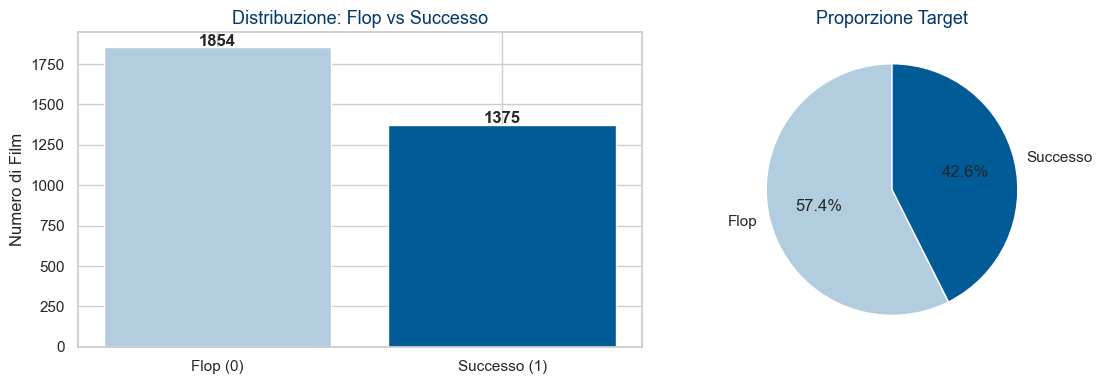

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

#barplot conteggio
conteggi = df_pulito['success'].value_counts()
axes[0].bar(['Flop (0)', 'Successo (1)'], conteggi.values, color=['#b3cde0', '#005b96'])
axes[0].set_title('Distribuzione: Flop vs Successo', fontsize=13, color='#03396c')
axes[0].set_ylabel('Numero di Film')
for i, v in enumerate(conteggi.values):
    axes[0].text(i, v + 10, str(v), ha='center', fontweight='bold')

#pie chart
axes[1].pie(conteggi.values, labels=['Flop', 'Successo'], autopct='%1.1f%%',
            colors=['#b3cde0', '#005b96'], startangle=90)
axes[1].set_title('Proporzione Target', fontsize=13, color='#03396c')

plt.tight_layout()
plt.savefig('../docs/target_distribution.png', bbox_inches='tight')
plt.show()

## Distribuzione del ROI (Revenue / Budget)

C:\Users\annac\AppData\Local\Temp\ipykernel_20752\3623109632.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_pulito, x='success', y='roi', ax=axes[1],
C:\Users\annac\AppData\Local\Temp\ipykernel_20752\3623109632.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Flop', 'Successo'])


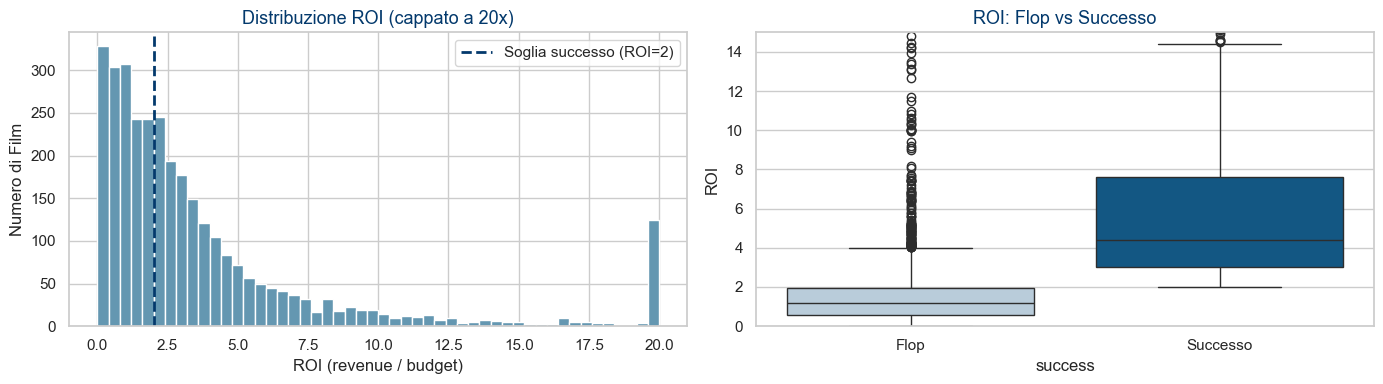

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

#Histogram ROI
roi_clip = df_pulito['roi'].clip(upper=20)
axes[0].hist(roi_clip, bins=50, color='#6497b1', edgecolor='white')
axes[0].axvline(x=2.0, color='#03396c', linestyle='--', linewidth=2, label='Soglia successo (ROI=2)')
axes[0].set_title('Distribuzione ROI', fontsize=13, color='#03396c')
axes[0].set_xlabel('ROI (revenue / budget)')
axes[0].set_ylabel('Numero di Film')
axes[0].legend()

#Boxplot ROI per successo/flop
sns.boxplot(data=df_pulito, x='success', y='roi', ax=axes[1],
            palette={'0': '#b3cde0', '1': '#005b96'})
axes[1].set_ylim(0, 15)
axes[1].set_title('ROI: Flop vs Successo', fontsize=13, color='#03396c')
axes[1].set_xticklabels(['Flop', 'Successo'])
axes[1].set_ylabel('ROI')

plt.tight_layout()
plt.savefig('../docs/roi_distribution.png', bbox_inches='tight')
plt.show()

## Successo per Genere

Analizziamo il tasso di successo per ogni genere cinematografico principale.

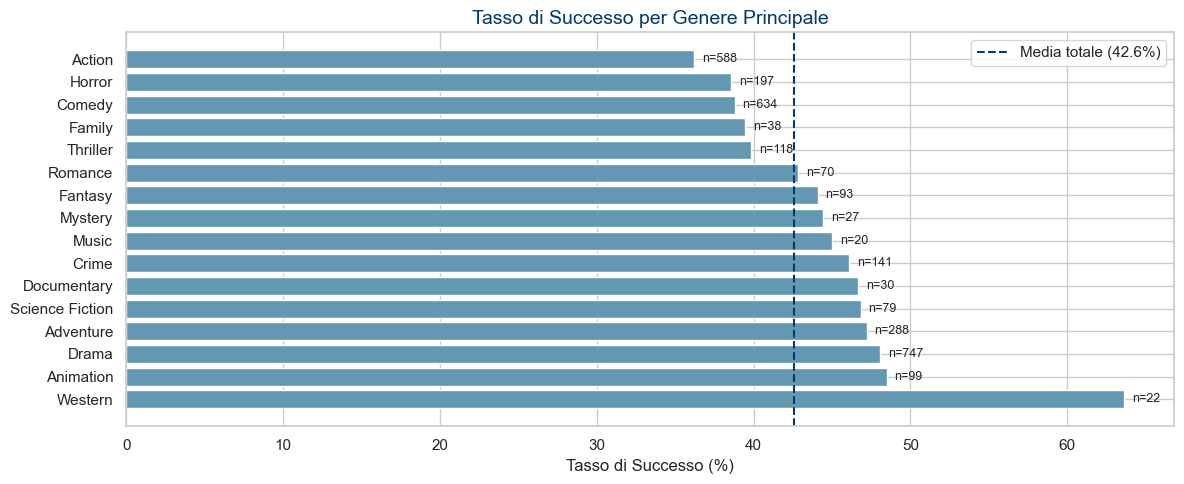

In [41]:
success_per_genere = (
    df_pulito.groupby('main_genre')['success']
    .agg(['mean', 'count'])
    .rename(columns={'mean': 'success_rate', 'count': 'n_film'})
    .query('n_film >= 20')          # solo generi con almeno 20 film
    .sort_values('success_rate', ascending=False)
)

plt.figure(figsize=(12, 5))
bars = plt.barh(success_per_genere.index, success_per_genere['success_rate'] * 100,
                color='#6497b1', edgecolor='white')
plt.xlabel('Tasso di Successo (%)')
plt.title('Tasso di Successo per Genere Principale', fontsize=14, color='#03396c')
plt.axvline(x=df_pulito['success'].mean()*100, color='#03396c', linestyle='--',
            label=f'Media totale ({df_pulito["success"].mean()*100:.1f}%)')
plt.legend()

#etichette con il numero di film
for i, (rate, count) in enumerate(zip(success_per_genere['success_rate'], success_per_genere['n_film'])):
    plt.text(rate * 100 + 0.5, i, f'n={count}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('../docs/success_per_genre.png', bbox_inches='tight')
plt.show()

## Budget vs Revenue

Scatterplot per visualizzare la relazione tra budget investito e ricavi ottenuti,
colorato per variabile target.

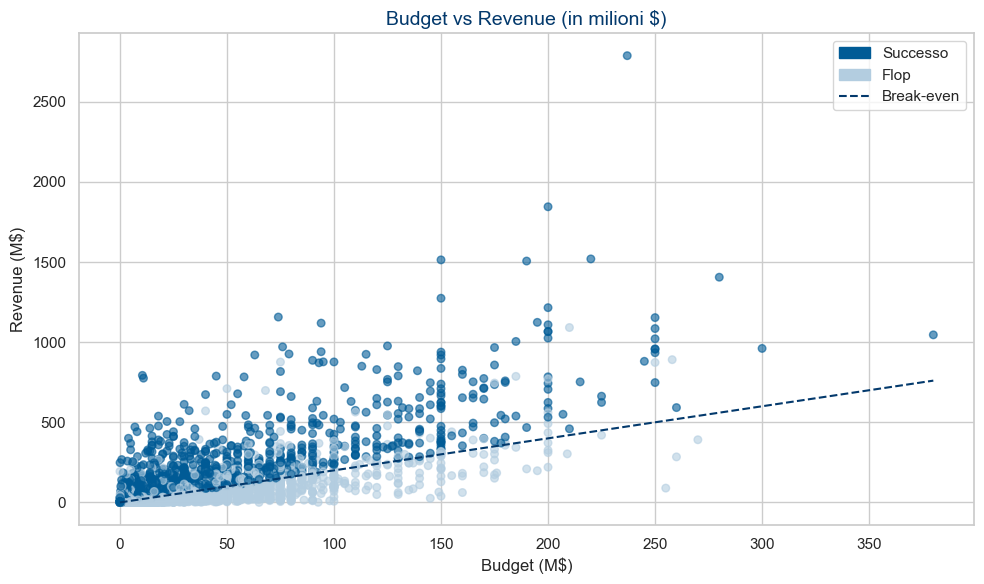

In [42]:
plt.figure(figsize=(10, 6))

colori = df_pulito['success'].map({0: '#b3cde0', 1: '#005b96'})
plt.scatter(df_pulito['budget'] / 1e6, df_pulito['revenue'] / 1e6,
            c=colori, alpha=0.6, s=30)

#linea di break-even (revenue = 2 * budget)
max_budget = df_pulito['budget'].max() / 1e6
x_line = np.linspace(0, max_budget, 100)
plt.plot(x_line, 2 * x_line, color='#03396c', linestyle='--',
         linewidth=1.5, label='Break-even (ROI = 2x)')

#legenda manuale
from matplotlib.patches import Patch
legenda = [Patch(color='#005b96', label='Successo'), Patch(color='#b3cde0', label='Flop')]
plt.legend(handles=legenda + [plt.Line2D([0],[0], color='#03396c', linestyle='--', label='Break-even')])

plt.title('Budget vs Revenue (in milioni $)', fontsize=14, color='#03396c')
plt.xlabel('Budget (M$)')
plt.ylabel('Revenue (M$)')
plt.tight_layout()
plt.savefig('../docs/budget_vs_revenue.png', bbox_inches='tight')
plt.show()

## Distribuzione di vote_average per Successo/Flop

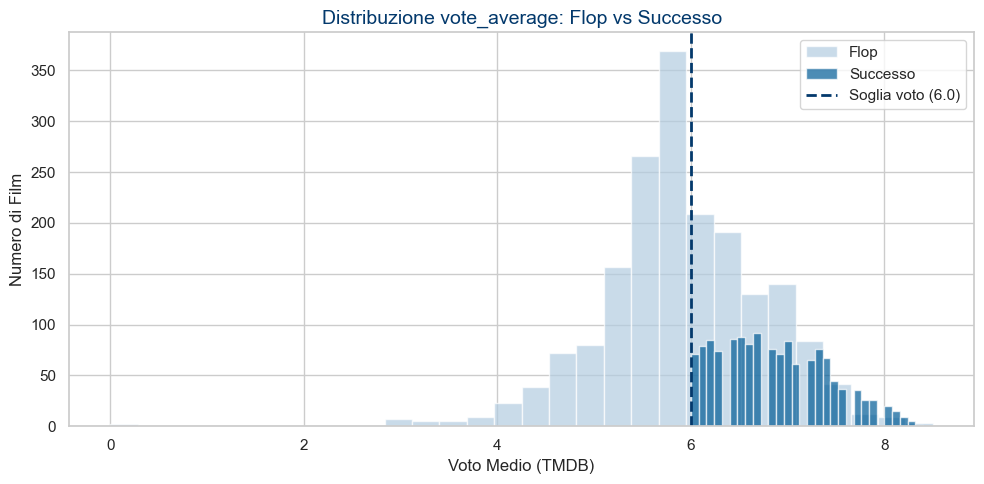

In [43]:
plt.figure(figsize=(10, 5))
for val, label, col in [(0, 'Flop', '#b3cde0'), (1, 'Successo', '#005b96')]:
    subset = df_pulito[df_pulito['success'] == val]['vote_average']
    plt.hist(subset, bins=30, alpha=0.7, label=label, color=col, edgecolor='white')

plt.axvline(x=6.0, color='#03396c', linestyle='--', linewidth=2, label='Soglia voto (6.0)')
plt.title('Distribuzione vote_average: Flop vs Successo', fontsize=14, color='#03396c')
plt.xlabel('Voto Medio (TMDB)')
plt.ylabel('Numero di Film')
plt.legend()
plt.tight_layout()
plt.savefig('../docs/vote_average_distribution.png', bbox_inches='tight')
plt.show()

## Heatmap di Correlazione tra Feature Numeriche

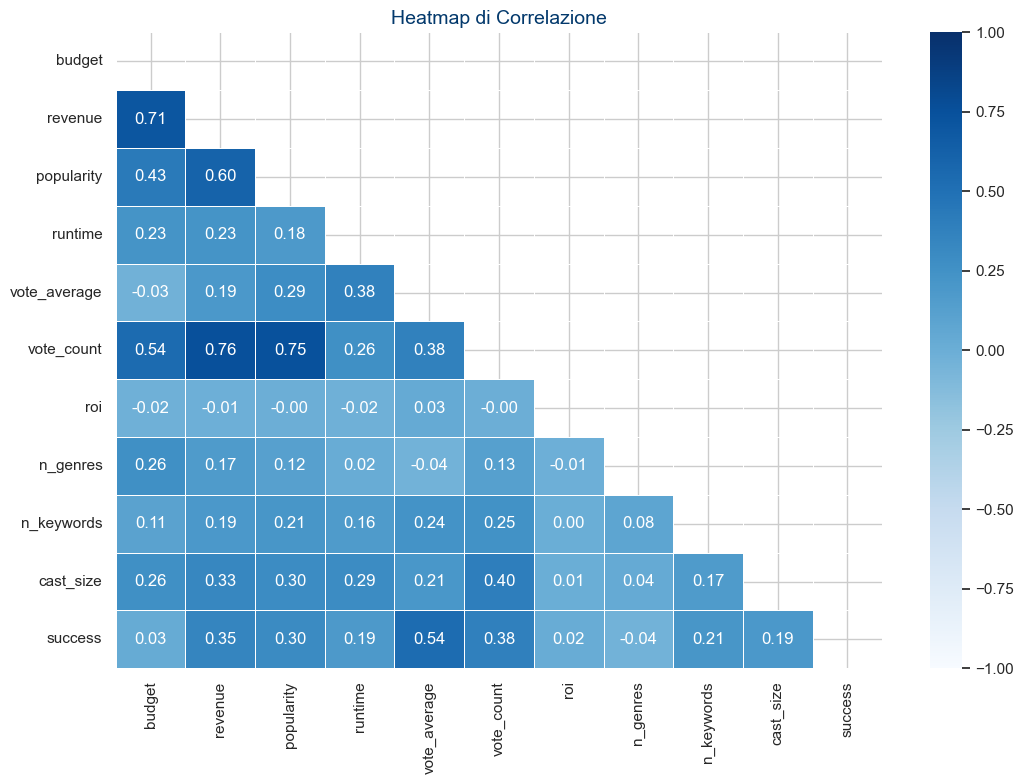

In [44]:
feature_numeriche = ['budget', 'revenue', 'popularity', 'runtime',
                     'vote_average', 'vote_count', 'roi', 'n_genres',
                     'n_keywords', 'cast_size', 'success']

corr_matrix = df_pulito[feature_numeriche].corr()

plt.figure(figsize=(11, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f',
            cmap='Blues', center=0, vmin=-1, vmax=1,
            linewidths=0.5, linecolor='white')
plt.title('Heatmap di Correlazione', fontsize=14, color='#03396c')
plt.tight_layout()
plt.savefig('../docs/correlation_heatmap.png', bbox_inches='tight')
plt.show()

## Tasso di Successo per Stagione di Uscita

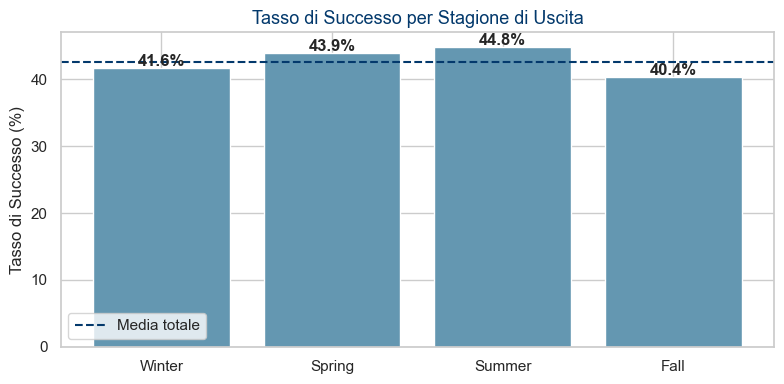

In [45]:
order_stagioni = ['Winter', 'Spring', 'Summer', 'Fall']
success_stagione = (
    df_pulito.groupby('release_season')['success']
    .mean()
    .reindex(order_stagioni) * 100
)

plt.figure(figsize=(8, 4))
plt.bar(success_stagione.index, success_stagione.values, color='#6497b1', edgecolor='white')
plt.axhline(y=df_pulito['success'].mean()*100, color='#03396c',
            linestyle='--', label='Media totale')
plt.title('Tasso di Successo per Stagione di Uscita', fontsize=13, color='#03396c')
plt.ylabel('Tasso di Successo (%)')
plt.legend()
for i, v in enumerate(success_stagione.values):
    plt.text(i, v + 0.3, f'{v:.1f}%', ha='center', fontweight='bold')
plt.tight_layout()
plt.savefig('../docs/success_per_season.png', bbox_inches='tight')
plt.show()

## Boxplot degli Outlier sulle Feature Numeriche Chiave

Il boxplot degli incassi (revenue) mostra una distribuzione fortemente asimmetrica a destra (right-skewed): la mediana si attesta intorno ai 50-60 milioni, mentre i grandi blockbuster (Avengers, Avatar) generano outlier estremi nell'ordine dei miliardi. Questo giustifica l'utilizzo della mediana (invece della media) per l'imputazione.

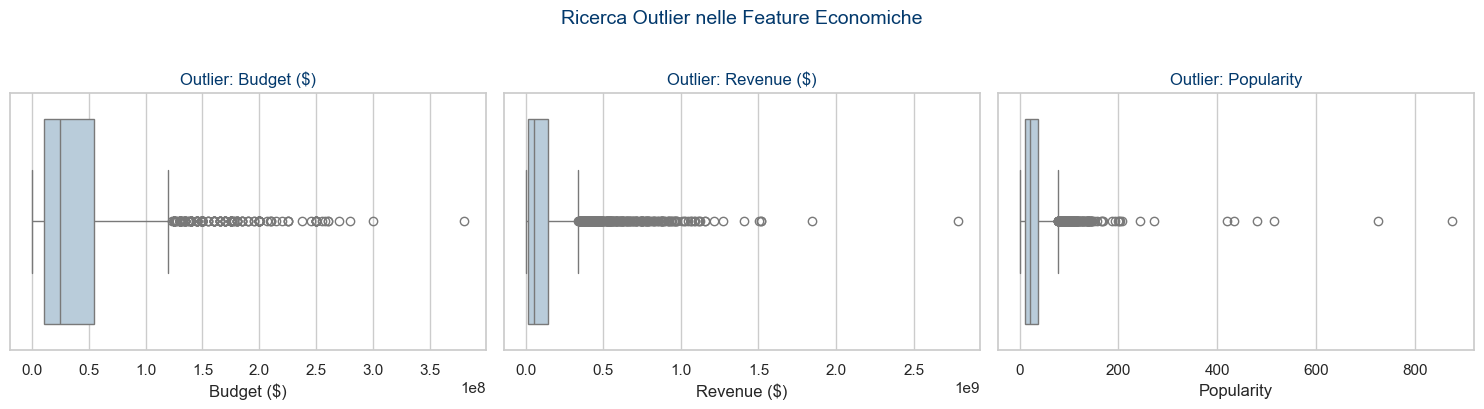

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, col, label in zip(axes,
                          ['budget', 'revenue', 'popularity'],
                          ['Budget ($)', 'Revenue ($)', 'Popularity']):
    sns.boxplot(x=df_pulito[col], ax=ax, color='#b3cde0')
    ax.set_title(f'Outlier: {label}', color='#03396c')
    ax.set_xlabel(label)

plt.suptitle('Ricerca Outlier nelle Feature Economiche', fontsize=14,
             color='#03396c', y=1.02)
plt.tight_layout()
plt.savefig('../docs/boxplot_outliers.png', bbox_inches='tight')
plt.show()

# Salvataggio del Dataset Pulito

In [47]:
percorso_salvataggio = '../data/processed/dataset_pulito.csv'
df_pulito.to_csv(percorso_salvataggio, index=False)

print(f"Dataset pulito salvato in: {percorso_salvataggio}")
print(f"Shape finale: {df_pulito.shape}")
print(f"\nColonne finali:")
for c in df_pulito.columns:
    print(f"  - {c} ({df_pulito[c].dtype})")

Dataset pulito salvato in: ../data/processed/dataset_pulito.csv
Shape finale: (3229, 28)

Colonne finali:
  - budget (int64)
  - id (int64)
  - original_language (str)
  - popularity (float64)
  - revenue (int64)
  - runtime (float64)
  - title (str)
  - vote_average (float64)
  - vote_count (int64)
  - genres_list (object)
  - main_genre (str)
  - keywords_list (object)
  - companies_list (object)
  - main_company (str)
  - countries_list (object)
  - languages_list (object)
  - lead_actor (str)
  - top3_cast (object)
  - cast_size (int64)
  - director (str)
  - roi (float64)
  - success (int64)
  - release_year (int32)
  - release_month (int32)
  - release_season (str)
  - n_genres (int64)
  - n_keywords (int64)
  - is_english (int64)
